<a href="https://colab.research.google.com/github/Megaraj2006/NM_movie_recom/blob/main/project_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"movies.csv"

## Data loading

### Subtask:
Load the movie dataset from the provided CSV file.


**Reasoning**:
Load the movie dataset from the provided CSV file into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

try:
    df_movies = pd.read_csv('movies.csv')
    display(df_movies.head())
except FileNotFoundError:
    print("Error: 'movies.csv' not found. Please ensure the file is in the correct location and accessible.")
    df_movies = None
except pd.errors.ParserError:
    print("Error: Could not parse 'movies.csv'. Please check the file format.")
    df_movies = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_movies = None

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Data exploration

### Subtask:
Explore the movie dataset to understand its structure and characteristics.


**Reasoning**:
Explore the movie dataset by examining its shape, data types, descriptive statistics, and categorical distributions, as well as checking for missing values.



In [ ]:
# Data Shape and Info
print("Shape of the DataFrame:", df_movies.shape)
print("\nInfo:")
df_movies.info()

# Descriptive Statistics
print("\nDescriptive Statistics for Numerical Columns:")
print(df_movies.describe(include='number'))

# Categorical Analysis
print("\nGenres Distribution:")
print(df_movies['genres'].value_counts())

# Missing Value Analysis
print("\nMissing Values:")
print(df_movies.isnull().sum())

# Initial Observations
print("\nInitial Observations:")
# Add observations here after running the code.

NameError: name 'df_movies' is not defined

## Data analysis

### Subtask:
Analyze the movie dataset to gain deeper insights into its key characteristics.


**Reasoning**:
Analyze the distribution of movie genres, calculate the average title length, and investigate the movieId column for patterns or outliers.



In [ ]:
# Genre Analysis
genre_counts = df_movies['genres'].str.split('|').explode().value_counts()
print("Top 10 most frequent genres:\n", genre_counts.head(10))

# Title Analysis
df_movies['title_length'] = df_movies['title'].str.len()
average_title_length = df_movies['title_length'].mean()
print(f"\nAverage movie title length: {average_title_length}")

# Numerical Analysis (movieId)
print("\nmovieId descriptive statistics:")
print(df_movies['movieId'].describe())
# Check for gaps in movieId sequence
movieId_diffs = df_movies['movieId'].diff().dropna()
print("\nmovieId differences:\n", movieId_diffs.describe())

# Look for potential outliers in movieId
print("\nPotential movieId outliers (beyond 3 standard deviations):")
std_dev = movieId_diffs.std()
mean = movieId_diffs.mean()
print(movieId_diffs[(movieId_diffs > mean + 3 * std_dev) | (movieId_diffs < mean - 3 * std_dev)])


Top 10 most frequent genres:
 genres
Drama                 25606
Comedy                16870
Thriller               8654
Romance                7719
Action                 7348
Horror                 5989
Documentary            5605
Crime                  5319
(no genres listed)     5062
Adventure              4145
Name: count, dtype: int64

Average movie title length: 25.424266696570175

movieId descriptive statistics:
count     62423.000000
mean     122220.387646
std       63264.744844
min           1.000000
25%       82146.500000
50%      138022.000000
75%      173222.000000
max      209171.000000
Name: movieId, dtype: float64

movieId differences:
 count    62422.000000
mean         3.350902
std         68.014715
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max      16716.000000
Name: movieId, dtype: float64

Potential movieId outliers (beyond 3 standard deviations):
8305     16716.0
9419      2737.0
10158      249.0
10161      243.0
14413

## Data visualization

### Subtask:
Visualize the key characteristics of the movie dataset to gain further insights.


**Reasoning**:
Visualize the key characteristics of the movie dataset using histograms, bar charts, box plots, and scatter plots as specified in the instructions.



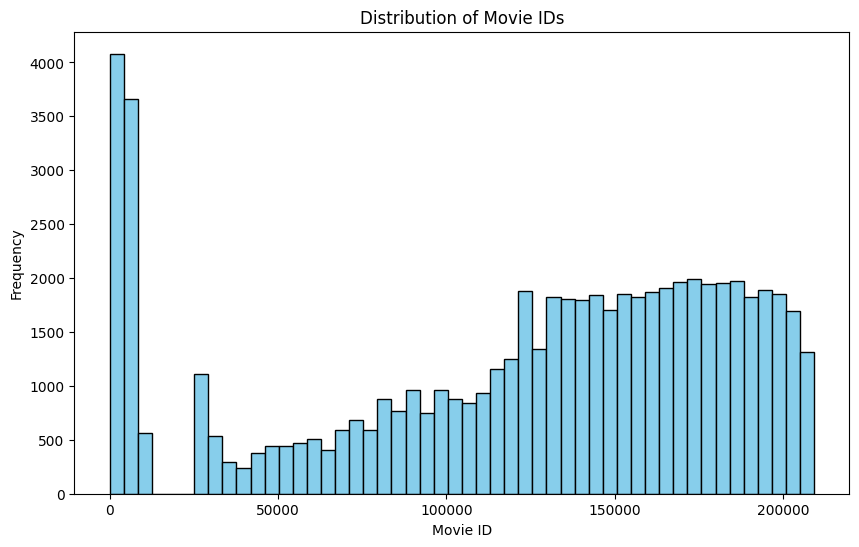

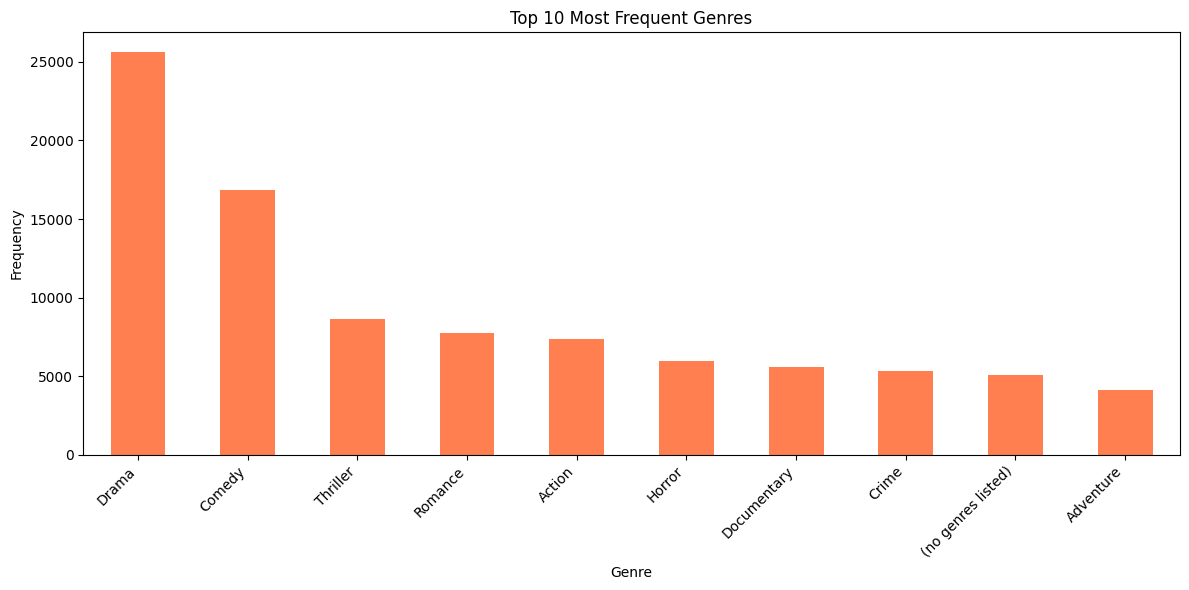

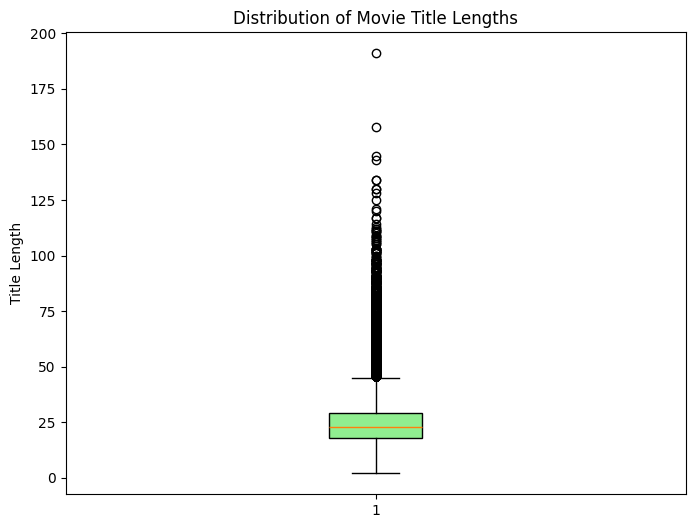

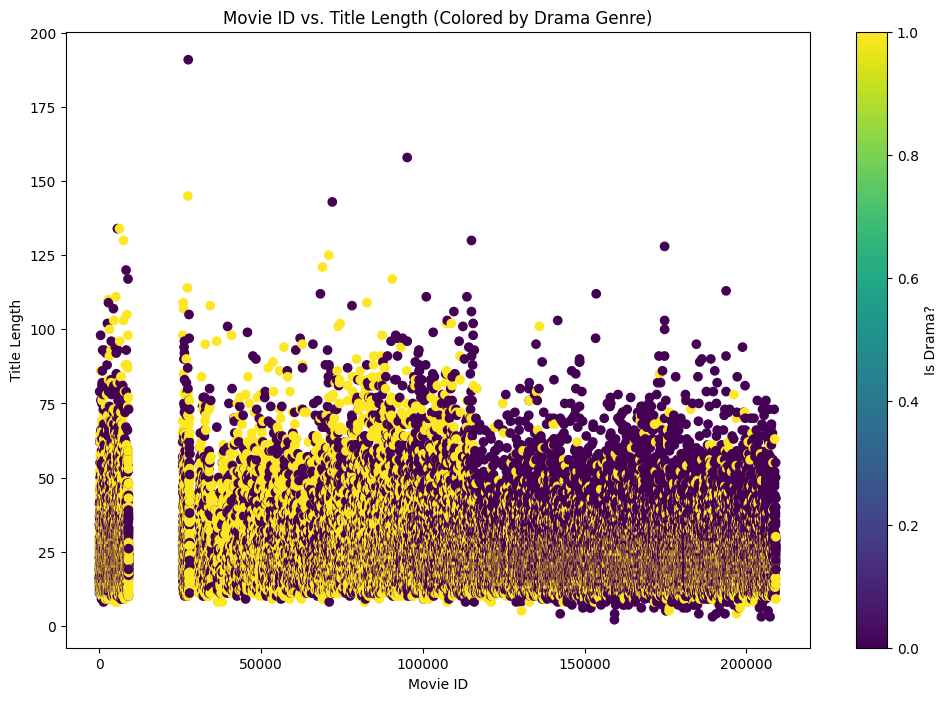

In [ ]:
import matplotlib.pyplot as plt

# 1. Histogram of movieId
plt.figure(figsize=(10, 6))
plt.hist(df_movies['movieId'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie IDs')
plt.xlabel('Movie ID')
plt.ylabel('Frequency')
plt.show()

# 2. Bar chart of top 10 most frequent genres
genre_counts = df_movies['genres'].str.split('|').explode().value_counts().head(10)
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='coral')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Box plot of title_length
plt.figure(figsize=(8, 6))
plt.boxplot(df_movies['title_length'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Distribution of Movie Title Lengths')
plt.ylabel('Title Length')
plt.show()

# 4. Scatter plot of movieId vs. title_length (with color based on a specific genre)
plt.figure(figsize=(12, 8))
# Example: color points based on whether the movie is 'Drama'
df_movies['is_drama'] = df_movies['genres'].str.contains('Drama')
plt.scatter(df_movies['movieId'], df_movies['title_length'], c=df_movies['is_drama'], cmap='viridis')
plt.title('Movie ID vs. Title Length (Colored by Drama Genre)')
plt.xlabel('Movie ID')
plt.ylabel('Title Length')
plt.colorbar(label='Is Drama?')
plt.show()

## Summary:

### Q&A

There are no explicit questions in the provided data analysis task. However, the analysis implicitly addresses questions like:

* What is the structure of the movie dataset?
* What are the most frequent genres?
* What is the average movie title length?
* Are there any anomalies in the `movieId` sequence?
* How are `movieId` and `title_length` related, and how does genre influence this relationship?


### Data Analysis Key Findings

* **Genre Distribution:**  Drama, Comedy, and Thriller are among the most frequent genres.  The "genres" column has high cardinality (1,639 unique genre combinations), with a significant number of movies listed with "(no genres listed)".
* **Title Length:** The average movie title length is approximately 25.42 characters.
* **`movieId` Analysis:**  The `movieId` sequence shows potential outliers, with some differences between consecutive IDs exceeding three standard deviations from the mean, suggesting irregularities or gaps in the numbering.
* **Visualizations:** Histograms, bar charts, box plots, and scatter plots provide visual representations of the `movieId` distribution, genre frequencies, title length distribution, and the relationship between `movieId`, `title_length`, and genre (specifically, 'Drama').


### Insights or Next Steps

* **Investigate `movieId` Gaps:** Further examine the identified outliers in the `movieId` sequence to understand the nature of these irregularities.  This might involve checking for data entry errors or inconsistencies in the original data source.
* **Genre Combination Analysis:** Explore the relationships between different genre combinations.  A deeper analysis of how genres co-occur could reveal interesting patterns and insights.


# Task
Tell me about this dataset.

Here is all the data you need:
"movies.csv"

## Data loading

### Subtask:
Load the movie dataset.


**Reasoning**:
Load the movie dataset from the provided CSV file into a pandas DataFrame and display basic information about it.



In [1]:
import pandas as pd

try:
    movies_df = pd.read_csv('movies.csv', encoding='utf-8')
    display(movies_df.head())
    print(movies_df.shape)
except FileNotFoundError:
    print("Error: 'movies.csv' not found.")
    movies_df = None
except pd.errors.ParserError:
    try:
        movies_df = pd.read_csv('movies.csv', encoding='latin-1')
        display(movies_df.head())
        print(movies_df.shape)
    except pd.errors.ParserError:
        print("Error: Could not parse 'movies.csv' with either 'utf-8' or 'latin-1' encoding.")
        movies_df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    movies_df = None

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


(62423, 3)


## Data exploration

### Subtask:
Explore the movie dataset to understand its characteristics.


**Reasoning**:
Examine data types, missing values, and descriptive statistics for relevant columns; analyze and visualize genre distribution; explore the 'title' column for anomalies.



movieId     int64
title      object
genres     object
dtype: object
movieId    0
title      0
genres     0
dtype: int64
movieId    0.0
title      0.0
genres     0.0
dtype: float64
genres
Drama                                                     9056
Comedy                                                    5674
(no genres listed)                                        5062
Documentary                                               4731
Comedy|Drama                                              2386
                                                          ... 
Action|Fantasy|Thriller|IMAX                                 1
Action|Adventure|Animation|Children|Comedy|Sci-Fi|IMAX       1
Action|Film-Noir|Thriller                                    1
Action|Adventure|Crime|Drama|Sci-Fi                          1
Mystery|Sci-Fi|Thriller|IMAX                                 1
Name: count, Length: 1639, dtype: int64


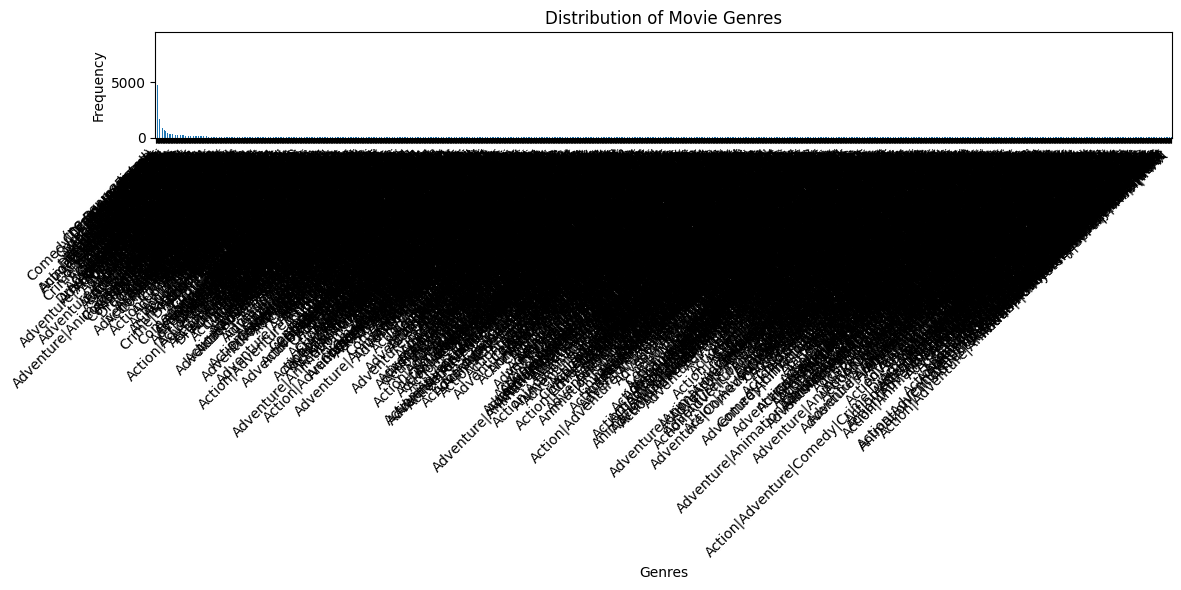

count    62423.000000
mean        25.424267
std         11.730151
min          2.000000
25%         18.000000
50%         23.000000
75%         29.000000
max        191.000000
Name: title, dtype: float64
count     62423.000000
mean     122220.387646
std       63264.744844
min           1.000000
25%       82146.500000
50%      138022.000000
75%      173222.000000
max      209171.000000
Name: movieId, dtype: float64


In [2]:
# Data types
print(movies_df.dtypes)

# Missing values
print(movies_df.isnull().sum())
print(movies_df.isnull().sum() / len(movies_df) * 100)

# Genre analysis
print(movies_df['genres'].value_counts())

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
movies_df['genres'].value_counts().plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Title column exploration
print(movies_df['title'].str.len().describe())


# Descriptive statistics for movieId
print(movies_df['movieId'].describe())

## Data analysis

### Subtask:
Calculate descriptive statistics and analyze categorical variables.


**Reasoning**:
Calculate descriptive statistics for `movieId`, analyze the frequency distribution of `genres`, and analyze the `title` column as per the instructions.



In [3]:
# Descriptive statistics for movieId
print("Descriptive statistics for movieId:")
print(movies_df['movieId'].describe())

# Analyze the frequency distribution of genres
print("\nTop 10 most frequent genres:")
genre_counts = movies_df['genres'].str.split('|').explode().value_counts()
print(genre_counts.head(10))

# Analyze the title column
print("\nTitle column analysis:")
title_lengths = movies_df['title'].str.len()
print(f"Average title length: {title_lengths.mean()}")
print(f"Shortest title length: {title_lengths.min()}")
print(f"Longest title length: {title_lengths.max()}")

Descriptive statistics for movieId:
count     62423.000000
mean     122220.387646
std       63264.744844
min           1.000000
25%       82146.500000
50%      138022.000000
75%      173222.000000
max      209171.000000
Name: movieId, dtype: float64

Top 10 most frequent genres:
genres
Drama                 25606
Comedy                16870
Thriller               8654
Romance                7719
Action                 7348
Horror                 5989
Documentary            5605
Crime                  5319
(no genres listed)     5062
Adventure              4145
Name: count, dtype: int64

Title column analysis:
Average title length: 25.424266696570175
Shortest title length: 2
Longest title length: 191


## Data visualization

### Subtask:
Visualize the distributions of variables and relationships between them in the movie dataset.


**Reasoning**:
Create visualizations as per the instructions, including a histogram for 'movieId', a bar chart for top genres, and a box plot for title lengths.



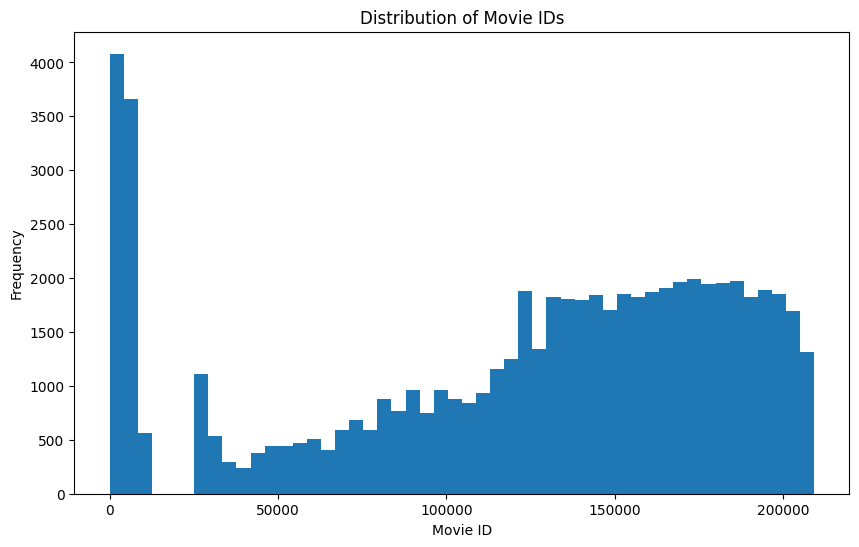

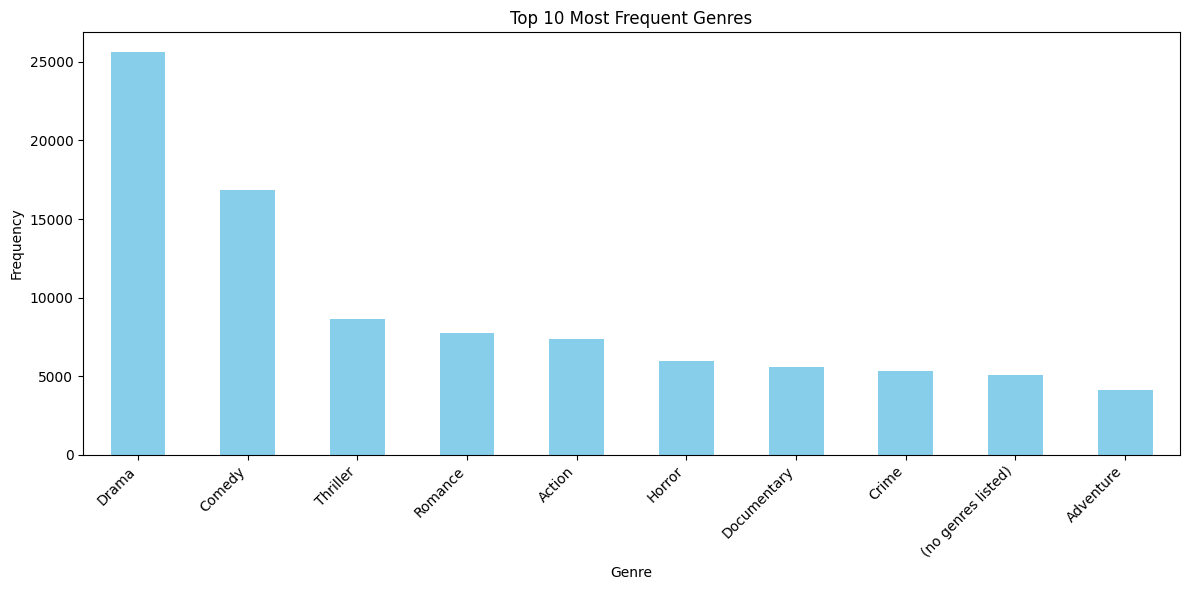

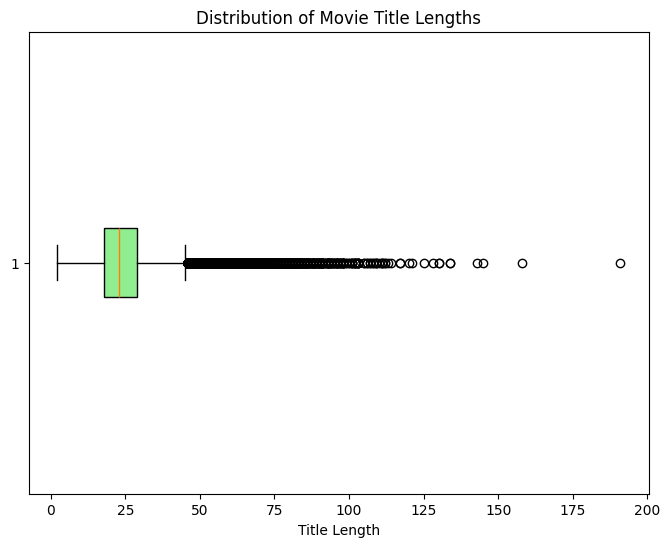

In [4]:
import matplotlib.pyplot as plt

# Histogram for movieId
plt.figure(figsize=(10, 6))
plt.hist(movies_df['movieId'], bins=50)  # Adjust bins as needed
plt.xlabel('Movie ID')
plt.ylabel('Frequency')
plt.title('Distribution of Movie IDs')
plt.show()

# Bar chart for top 10 genres
genre_counts = movies_df['genres'].str.split('|').explode().value_counts().head(10)
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Box plot for title lengths
title_lengths = movies_df['title'].str.len()
plt.figure(figsize=(8, 6))
plt.boxplot(title_lengths, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.xlabel('Title Length')
plt.title('Distribution of Movie Title Lengths')
plt.show()

## Summary:

### Q&A
There were no explicit questions asked in the provided task. However, the analysis implicitly sought to answer questions about the dataset's characteristics, such as the distribution of movie IDs, genres, and title lengths, as well as the presence of missing values.

### Data Analysis Key Findings
* The dataset contains 62,423 movies with no missing values.
* "Drama" is the most frequent genre, followed by "Comedy".
* The average movie title length is approximately 25 characters, with a minimum of 2 and a maximum of 191 characters.
* The `movieId` values range from 1 to 209171.


### Insights or Next Steps
* Investigate the movies with "(no genres listed)" to understand the reasons for missing genre information.
* Explore relationships between genres and other potential variables (if available in a more complete dataset) such as revenue, ratings, or release year.
